# 1. Numpy and pytorch example

https://github.com/numpy/numpy  
https://github.com/pytorch/pytorch

# 2. Image_parser repo
- src
- tests
- third_party
- pliki `requirements.txt` i `environment.yml`
- folder data

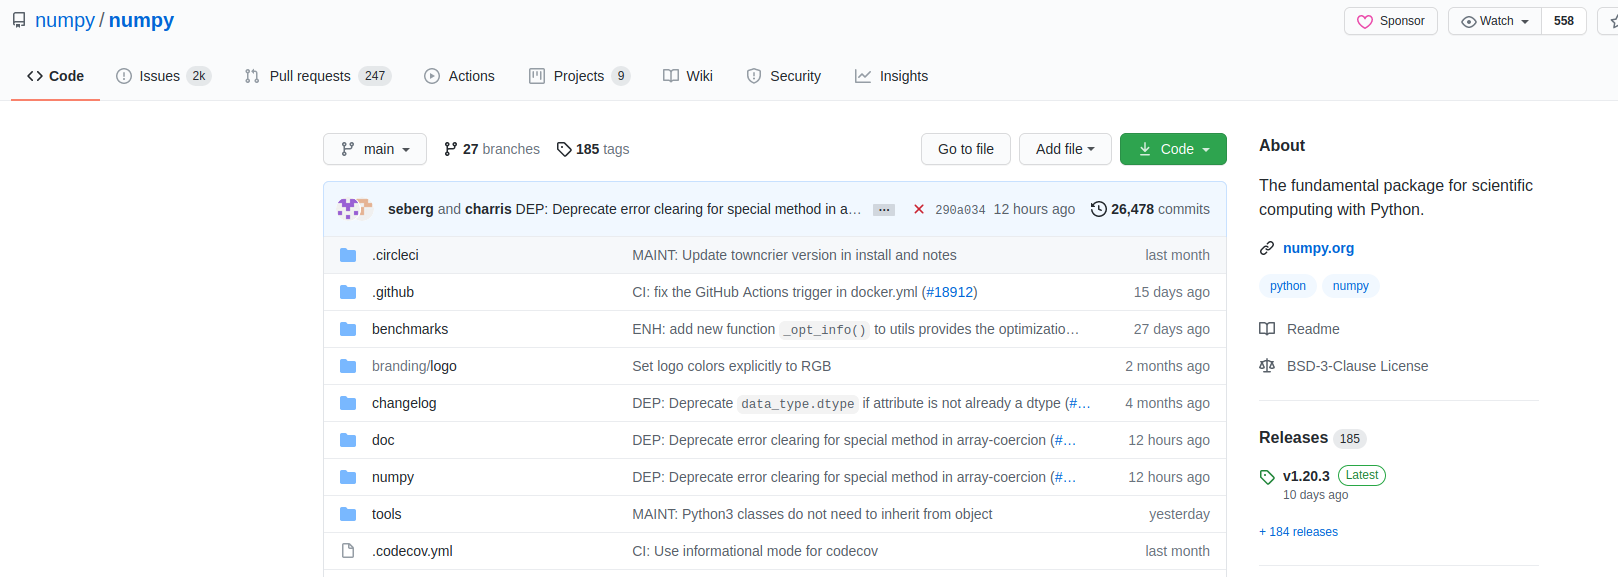

# 3. Omówienie programu
- testowanie/dokumentowanie z użyciem klauzuli `__name__=='__main__'`
- dokumentowanie z narzędziami pycharm

# 4. Pytest
https://docs.pytest.org/en/6.2.x/index.html

# 5. Zadania
1. utworzyć nowe fixtures: stała, macierz jednostkowa numpy z użyciem np.eye, tupla 5 losowych liczb (seed)
2. napisać testy dla fixtures
3. napisać test dla download_url(wspólnie)
4. napisać test dla download_and_extract


# 6. Pytest is more than that
- parametryzowanie testów
- requests
- conftest i struktura folderu tests

# 7. Testy w trakcie rozwoju oprogramowania
- change label file to ids

# 8. Instalacja black
https://black.readthedocs.io/en/stable/integrations/editors.html

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from image_parser import *

In [7]:
download_and_extract('https://nextcloud.toucan.systems/index.php/s/jzRLiBHHbjaHesH/download', './data/cifar10.tgz')

  0%|          | 0/184913920 [00:00<?, ?B/s]

In [2]:
download_and_extract

NameError: name 'download_and_extract' is not defined

In [12]:
labels = {v:k for k,v in enumerate(sorted(set(d.values())))}

In [13]:
d = dict()
d_id = dict()
for file in Path('./data/cifar10').glob('**/*.png'):
    filename = file.relative_to('data/cifar10')
    label = file.parent.name
    d[str(filename)] = label
    d_id[str(filename)] = labels[label]

In [20]:
import json

In [21]:
with open('data/cifar10/label_ids_test.json', 'w') as outfile:
    json.dump(dict(labels=labels, files=d_id), outfile, indent=2)

In [40]:
with open('data/cifar10/label_names.json', 'w') as outfile:
    json.dump(dict(files=d), outfile, indent=2)

In [33]:
labels

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [15]:
with open('tests/data/label_names_test.json') as infile:
    data = json.load(infile)

In [17]:
d = data['files']

In [19]:
d_id = {k:labels[v] for k,v in d.items()}

In [20]:
d_id

{'train/cat/1057.png': 3,
 'train/truck/1426.png': 9,
 'train/truck/0883.png': 9,
 'train/truck/1312.png': 9,
 'train/airplane/1057.png': 0,
 'train/airplane/3824.png': 0,
 'train/automobile/1312.png': 1,
 'train/frog/1057.png': 6,
 'train/bird/2177.png': 2,
 'train/horse/1312.png': 7,
 'train/dog/1057.png': 5,
 'train/dog/3123.png': 5,
 'train/ship/3989.png': 8,
 'train/ship/1312.png': 8,
 'test/cat/0835.png': 3,
 'test/cat/0810.png': 3,
 'test/cat/0883.png': 3,
 'test/cat/0223.png': 3,
 'test/truck/0969.png': 9,
 'test/airplane/0835.png': 0,
 'test/airplane/0810.png': 0,
 'test/airplane/0490.png': 0,
 'test/deer/0069.png': 4,
 'test/deer/0223.png': 4,
 'test/automobile/0969.png': 1,
 'test/frog/0835.png': 6,
 'test/frog/0810.png': 6,
 'test/frog/0463.png': 6,
 'test/bird/0302.png': 2,
 'test/horse/0979.png': 7,
 'test/horse/0218.png': 7,
 'test/horse/0969.png': 7,
 'test/dog/0835.png': 5,
 'test/dog/0824.png': 5,
 'test/ship/0557.png': 8}

In [49]:
import pandas as pd

In [15]:
file.relative_to('data/cifar10')

PosixPath('test/ship/0969.png')

In [66]:
df = pd.DataFrame.from_dict(data['files'], orient='index')

In [60]:
df.to_csv('labels.csv', index=False)

In [68]:
df.reset_index(inplace=True)
df.rename(columns={'index':'filepath', 0:'label'}, inplace=True)

In [69]:
df

,filepath,label
0,train/cat/1057.png,cat
1,train/cat/4694.png,cat
2,train/cat/0835.png,cat
3,train/cat/2869.png,cat
4,train/cat/2729.png,cat
...,...,...
59995,test/ship/0411.png,ship
59996,test/ship/0512.png,ship
59997,test/ship/0524.png,ship
59998,test/ship/0218.png,ship


In [6]:
converters.to_csv('data/cifar10/label_ids.json', 'labels.csv')

In [ ]:
pd.read_csv()

In [23]:
import numpy as np

In [26]:
np.eye(5).trace()

5.0

In [31]:
import random

In [37]:
np.random.seed(10)

In [42]:
np.random.randint(10, size=10)

array([6, 5, 3, 9, 6, 9, 1, 9, 4, 2])

In [38]:
np.random.rand(10)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])